<a href="https://colab.research.google.com/github/huy20146177/baitapAI/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

So nay la: 2


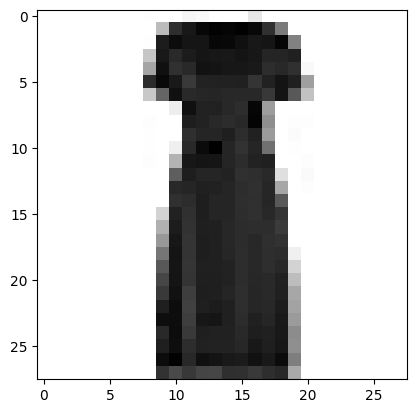

In [7]:
import matplotlib.pyplot as plt
hinh= x_train[50]   #Lấy hình ở vị trí thứ 55
plt.imshow(hinh,cmap=plt.cm.binary)
plt.show
print("So nay la:",y_train[5])

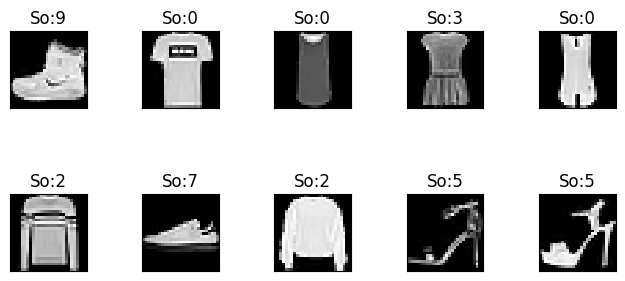

In [8]:
for i in range(10):
  plt.subplot(3,5,i+1)  # 2 hàng 5 cột 
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title("So:{}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [9]:
from keras.models import Sequential
from keras.layers import Dense

model= Sequential()
model.add(Dense(512, input_shape = (28*28,), activation = 'relu'))
model.add(Dense(10,activation= 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [10]:
x_train = x_train.reshape((60000,28*28))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

In [11]:
from keras.utils import to_categorical #Lệnh chuyển qua 

y_train = to_categorical(y_train, 10) #chuyển sang 10 kênh
y_test = to_categorical(y_test, 10)

In [12]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs = 10, batch_size= 128) # Mỗi lần học chỉ 128 dữ liệu, không học hết 60000 dữ liệu , học tổng cộng 10 lầnlần
test_loss, test_acc = model.evaluate(x_test,y_test)
print('test_accuracy:',test_acc)
print('test_loss:',test_loss)

Epoch 1/10
469/469 [==============================] - 12s 22ms/step - loss: 0.5629 - accuracy: 0.7998
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 0.3846 - accuracy: 0.8594
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.3390 - accuracy: 0.8744
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3128 - accuracy: 0.8849
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2956 - accuracy: 0.8911
Epoch 6/10
469/469 [==============================] - 4s 10ms/step - loss: 0.2797 - accuracy: 0.8963
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2645 - accuracy: 0.9004
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2555 - accuracy: 0.9039
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2448 - accuracy: 0.9093
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.3266 - accurac

In [13]:
from keras.models import load_model
# Tải mô hình từ file đã lưu
model = load_model('./model_fashion_mnist.h5')

In [14]:
model.save('model_fashion_mnist.h5')